# Practice 1

Student 1: <font color="blue">Alejandro González Álvarez</font>

NIA 1: <font color="blue">252658</font>

Student 2: <font color="blue">Luca Franceschi</font>

NIA 2: <font color="blue">253885</font>

Student 3: <font color="blue">Júlia Othats-Dalès</font>

NIA 3: <font color="blue">254435</font>

# Ex. 1

In [55]:
'''
Steps :
  1. Load train.csv and test.csv containing a 2D dataset (features X and Y) with two different classes
  2. Visualize the dataset and normalize the dimensions of the samples to have zero mean and unit standard deviation
  3. Implement an MLP using Numpy in order to solve a classification problem trying to estimate the classes of the samples
  4. Train the MLP and visualize the decision boundary in 2D of the classification. Plot the training loss for each iteration.
  5. Use the learned MLP to estimate the classes of the data in test.csv. Compute the accuracy in training and testing dataset.
'''

'\nSteps :\n  1. Load train.csv and test.csv containing a 2D dataset (features X and Y) with two different classes\n  2. Visualize the dataset and normalize the dimensions of the samples to have zero mean and unit standard deviation\n  3. Implement an MLP using Numpy in order to solve a classification problem trying to estimate the classes of the samples\n  4. Train the MLP and visualize the decision boundary in 2D of the classification. Plot the training loss for each iteration.\n  5. Use the learned MLP to estimate the classes of the data in test.csv. Compute the accuracy in training and testing dataset.\n'

## Sol. 1

Training dataset:

   Unnamed: 0         X         Y  C
0           0 -0.263997  1.006942  0
1           1  1.678440 -0.215066  1
2           2 -1.581623 -0.003148  0
3           3 -0.863377  0.751651  0
4           4  0.998721 -0.770067  1
Testing dataset:

   Unnamed: 0         X         Y  C
0           0  1.937660  0.624911  1
1           1 -1.004030 -0.097319  0
2           2  1.542199 -0.114397  0
3           3  0.625708 -0.685214  1
4           4  0.247116 -0.348297  1
Not normalized:



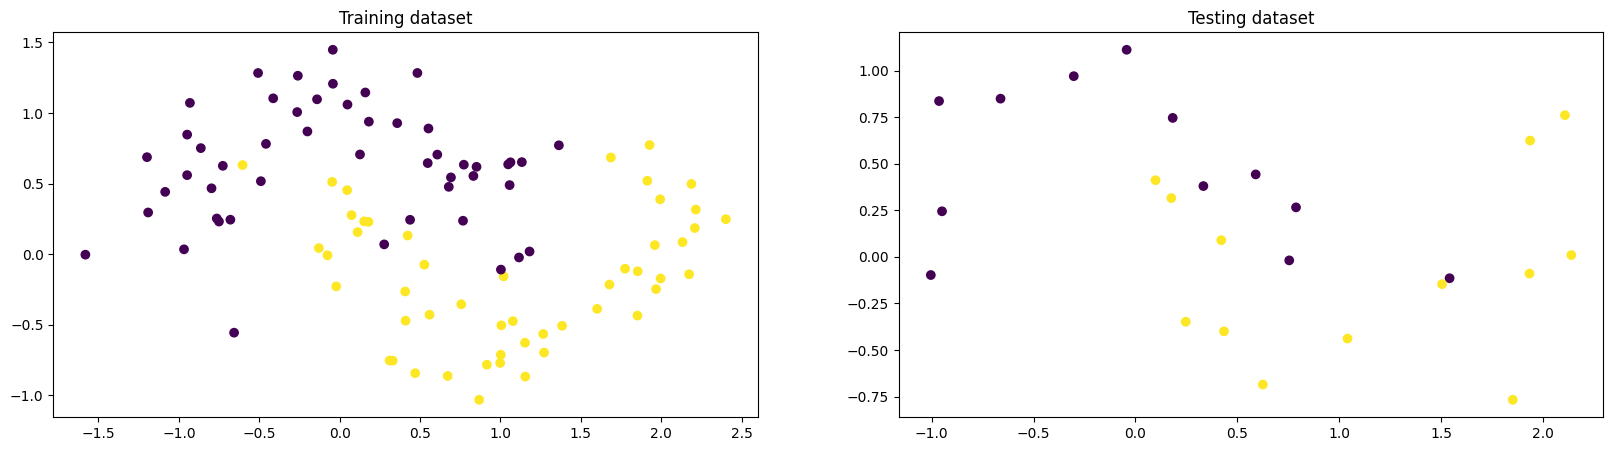


Normalized:



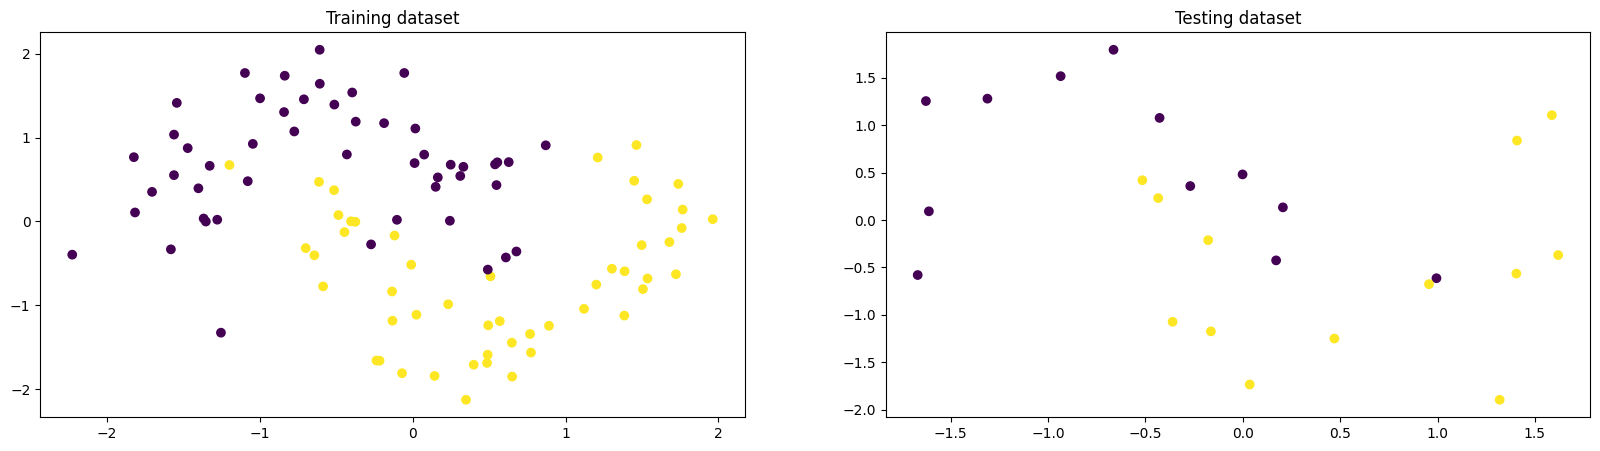

In [56]:
import pandas as pd # usage of Pandas to read and load data
import matplotlib.pyplot as plt # matplotlib for visualization
import numpy as np
from matplotlib.colors import ListedColormap

#1. Load train.csv and test.csv
train_df = pd.read_csv('Data/train.csv')
test_df = pd.read_csv('Data/test.csv')

# Show 5 first elements of the datasets
print("Training dataset:\n")
print(train_df.head(5))
print("Testing dataset:\n")
print(test_df.head(5))

#2. Visualize both training and testing data
print("Not normalized:\n")
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].scatter(train_df.X, train_df.Y, c = train_df.C)
axes[0].set_title("Training dataset")
axes[1].scatter(test_df.X, test_df.Y, c = test_df.C)
axes[1].set_title("Testing dataset")
plt.show()

# Normalize data (probar np column stack)
train_x = np.array(train_df[["X"]])
train_y = np.array(train_df[["Y"]].values)
test_x = np.array(test_df[["X"]].values)
test_y = np.array(test_df[["Y"]].values)

train_data = np.column_stack((train_x, train_y))
test_data = np.column_stack((test_x, test_y))

normalized_train = (train_data - np.mean(train_data, axis=0)) / np.std(train_data, axis=0)
normalized_test = (test_data - np.mean(test_data, axis=0)) / np.std(test_data, axis=0)

# normalized_train = (train_df[["X", "Y"]] - np.mean(train_df[["X", "Y"]], axis = 0)) / np.std(train_df[["X", "Y"]], axis = 0)
# normalized_test = (test_df[["X", "Y"]] - np.mean(test_df[["X", "Y"]], axis = 0)) / np.std(test_df[["X", "Y"]], axis = 0)

print("\nNormalized:\n")
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].scatter(normalized_train[:,0], normalized_train[:,1], c = train_df.C)
axes[0].set_title("Training dataset")
axes[1].scatter(normalized_test[:,0], normalized_test[:,1], c = test_df.C)
axes[1].set_title("Testing dataset")
plt.show()

In [57]:
#3. Implementation of the MLP Class:
class MLP(object):
    def __init__(self,inputNode=2, hiddenNode=3, outputNode=1):
        #Define MLP hyper-parameters
        self.inputLayerSize = inputNode # number of input dimensions (x)
        self.outputLayerSize = outputNode # number of output dimensions (y)
        self.hiddenLayerSize = hiddenNode # Dimension of intermediate layer (W_2)

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)

    def forward(self, X):
        #Compute inputs from outputs
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

    # Derivative of sigmoid and loss with respect their inputs
    def sigmoidPrime(self, z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)    # sigmoid(z) * (1 - sigmoid(z))

    def loss(self, yHat, y):
        #Compute loss for given X, y, use weights already stored in class.
        J = np.mean(-y * np.log(yHat) - (1-y)*np.log(1-yHat))
        return J

    # Derivative of parameters
    def backward(self, X, yHat, y):
        self.yHat = yHat
        delta3 = (yHat - y)     # dL / dz3
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T) * self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        return dJdW1,dJdW2
    
# Function to train a neural network (NN)
def train(NN:MLP, X, y, epoch = 10000, lr = .1):
    list_loss = []

    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        yHat = NN.forward(X)

        gradW1,gradW2 = NN.backward(X, yHat, y)
        #now update the weight using gradient descent
        NN.W1 -= gradW1 * lr
        NN.W2 -= gradW2 * lr

        if i%10 == 0 :
            loss = NN.loss(yHat, y)
            if i%100 == 0:
                print('Loss {}={}'.format(i, loss))
            list_loss.append(loss)

    return list_loss

def predict(NN:MLP, X):
    return np.round(NN.forward(X))

def accuracy(y, yHat):
    error = 0
    for c1, c2 in zip(y, yHat):
        if c1 != c2:
            error += 1
    return 1 - (error/len(y))

Loss 0=0.7914000149074257
Loss 100=0.3332997740998276
Loss 200=0.3280156939581367
Loss 300=0.3239070029357324
Loss 400=0.31952059246258946
Loss 500=0.3142624026306371
Loss 600=0.30788334956939656
Loss 700=0.3008343822196479
Loss 800=0.29414796302159146
Loss 900=0.2886149151168252
Loss 1000=0.28449797251025893
Loss 1100=0.2816510480637744
Loss 1200=0.27977172004673034
Loss 1300=0.27856486419194515
Loss 1400=0.2778006003746088
Loss 1500=0.27731821914681737
Loss 1600=0.27701185399609374
Loss 1700=0.2768141134461208
Loss 1800=0.27668295080676475
Loss 1900=0.276592444841701
Loss 2000=0.2765267335410479
Loss 2100=0.2764761583763032
Loss 2200=0.2764348599248014
Loss 2300=0.2763992945357661
Loss 2400=0.2763674088060842
Loss 2500=0.2808995653455772
Loss 2600=0.27756103749879474
Loss 2700=0.27697689954702037
Loss 2800=0.2767208452581936
Loss 2900=0.27656233563251176
Loss 3000=0.2764278152563079
Loss 3100=0.2763049313016118
Loss 3200=0.27620209239168286
Loss 3300=0.2761261733104972
Loss 3400=0.27

Text(0, 0.5, 'Loss (J) value')

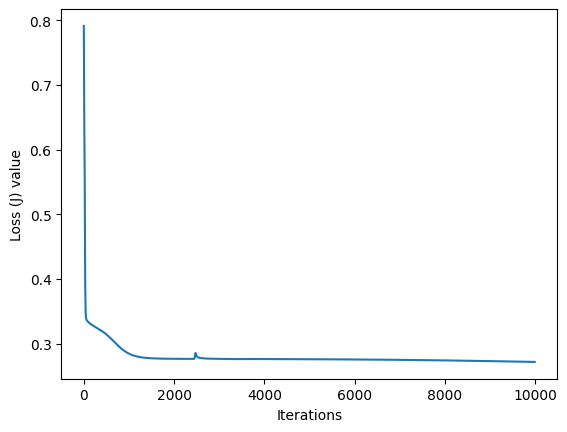

In [67]:
# Instantiate an MLP NN
mlp = MLP()

#4. Train the MLP, visualize decision boundary in 2D, and plot loss at each iteration
list_loss = train(mlp, train_df[["X", "Y"]], np.array([train_df.C]).reshape(100, 1), epoch = 10000, lr = 0.03)

# arange used for better visualization of iterations
plt.plot(10 * np.arange(len(list_loss)), list_loss)
plt.xlabel('Iterations')
plt.ylabel('Loss (J) value')

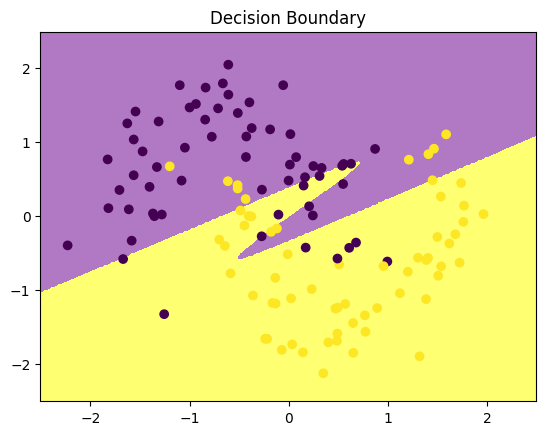

In [68]:
# Visualize the decision boundary in 2D of the classification
cmap_light = ListedColormap(['#7E1E9C99', '#FFFF1499'])

xx, yy = np.meshgrid(np.arange(-2.5, 2.5, 0.01), np.arange(-2.5, 2.5, 0.01))
xd = np.column_stack((xx.flatten(), yy.flatten()))
xd2 = predict(mlp, xd)
xd2 = xd2.reshape(xx.shape)

plt.figure()
plt.title('Decision Boundary')
plt.pcolormesh(xx, yy, xd2, cmap=cmap_light)
plt.scatter(normalized_test[:,0], normalized_test[:,1], c=test_df.C)
plt.scatter(normalized_train[:,0], normalized_train[:,1], c=train_df.C)
plt.show()
# plt.contour([normalized_test[:, 0], normalized_test[:, 1]], )

In [60]:
# 5. Apply on test dataset, and accuracy
test_yHat = predict(mlp, normalized_test)

test_accuracy = accuracy(test_df.C, test_yHat)
print("Accuracy obtained in test dataset: %.2f" % (test_accuracy * 100) + " %.")

Accuracy obtained in test dataset: 72.00 %.


# Ex. 2

In [61]:
'''
Instead of using the implemented optimizer with standard Gradient Descent, in this exercice you will use SGD with momentum.
This optimizer tipically accelerates the convergence of the optimization and, thus, it reduce the number of iterations during gradient-descent.
Steps :
  1. Try to understand how momentum is implemented reading carefully https://www.ruder.io/optimizing-gradient-descent/#momentum
  2. Modifying OptimSGD in the examples, implement SGD with momentum in a new class call OptimMom.
  3. Train the MLP implmented in numpy with this new optimizer.
  4. Use different values for the momentum paramter [0,1] and plot the evolution of the training loss during gradient-descent. Compare the results using the different values and standard gradient descent.
'''


'\nInstead of using the implemented optimizer with standard Gradient Descent, in this exercice you will use SGD with momentum.\nThis optimizer tipically accelerates the convergence of the optimization and, thus, it reduce the number of iterations during gradient-descent.\nSteps :\n  1. Try to understand how momentum is implemented reading carefully https://www.ruder.io/optimizing-gradient-descent/#momentum\n  2. Modifying OptimSGD in the examples, implement SGD with momentum in a new class call OptimMom.\n  3. Train the MLP implmented in numpy with this new optimizer.\n  4. Use different values for the momentum paramter [0,1] and plot the evolution of the training loss during gradient-descent. Compare the results using the different values and standard gradient descent.\n'

## Sol. 2

In [62]:
class OptimMom(object):
    def __init__(self,learning_rate = .001, gamma = 0.9):
        self.lr = learning_rate
        self.gamma = gamma
        self.last = 0
    # receive the parameters of the MLP and the computed gradients and update the latter
    def step(self,weight_list,gradient):
        uw = []
        for w,grd in zip(weight_list,gradient):
            VdW = (1-self.gamma)*self.last + self.gamma*grd
            uw.append(w - self.lr * VdW)
        return uw

In [63]:
# Same training procedure than befor but using the optimizer class
def train_woptimizer(NN,X, y, epoch = 5000, optim = None):
    list_loss = []

    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        yHat = NN.forward(X)

        gradW1,gradW2 = NN.backward(X,yHat,y)
        '''#now update the weight using gradient descent and the optimizer class
        NN.W1 -= gradW1 * lr
        NN.W2 -= gradW2 * lr'''
        NN.W1, NN.W2 = optim.step([NN.W1,NN.W2],[gradW1,gradW2])

        if i%10 == 0 :
            loss = NN.loss(yHat, y)
            if i%100 == 0:
                print('Loss {}={}'.format(i, loss))
            list_loss.append(loss)

    return list_loss

Loss 0=0.6727360037964923
Loss 100=0.33667857051977906
Loss 200=0.3339507949210602
Loss 300=0.33247242053715026
Loss 400=0.33154460526955665
Loss 500=0.3308233609891523
Loss 600=0.3298701789066019
Loss 700=0.3273550434363765
Loss 800=0.3228103755021899
Loss 900=0.3181861553174907
Loss 1000=0.31329696066136614
Loss 1100=0.3076134020045928
Loss 1200=0.301345436178642
Loss 1300=0.2952534482048607
Loss 1400=0.28999431125799574
Loss 1500=0.2858669328512431
Loss 1600=0.2828462810837026
Loss 1700=0.2807366516924966
Loss 1800=0.27930662927708616
Loss 1900=0.2783543376389385
Loss 2000=0.2777256330733746
Loss 2100=0.27731103410856073
Loss 2200=0.27703602771715147
Loss 2300=0.2768511988951536
Loss 2400=0.27672429710944174
Loss 2500=0.2766344838099597
Loss 2600=0.2765683806676108
Loss 2700=0.2765174362552408
Loss 2800=0.27647620207822615
Loss 2900=0.2764412156109454
Loss 3000=0.276410281008738
Loss 3100=0.27638200749885816
Loss 3200=0.276355513585326
Loss 3300=0.2763302373777509
Loss 3400=0.276305

Text(0, 0.5, 'Loss (J) value')

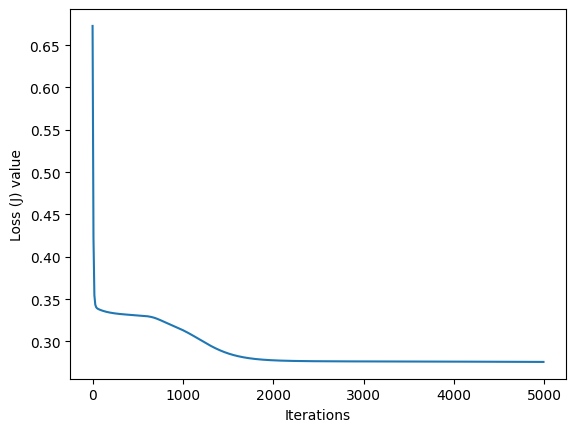

In [83]:
optim = OptimMom(learning_rate=0.03, gamma=0.9)
mlpMom = MLP()

list_loss = train_woptimizer(mlpMom, train_df[["X", "Y"]], np.array([train_df.C]).reshape(100, 1), optim=optim)

# arange used for better visualization of iterations
plt.plot(10 * np.arange(len(list_loss)), list_loss)
plt.xlabel('Iterations')
plt.ylabel('Loss (J) value')

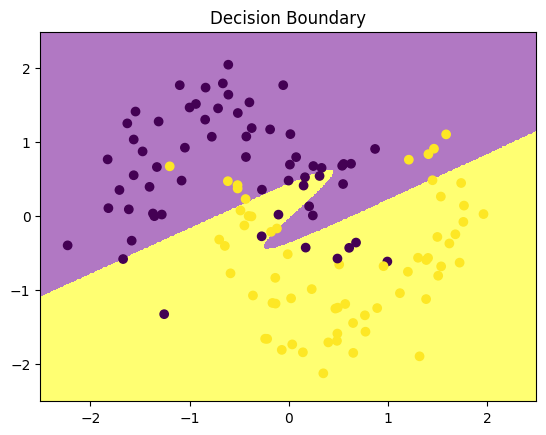

In [84]:
xx, yy = np.meshgrid(np.arange(-2.5, 2.5, 0.01), np.arange(-2.5, 2.5, 0.01))
xd = np.column_stack((xx.flatten(), yy.flatten()))
xd2 = predict(mlpMom, xd)
xd2 = xd2.reshape(xx.shape)

plt.figure()
plt.title('Decision Boundary')
plt.pcolormesh(xx, yy, xd2, cmap=cmap_light)
plt.scatter(normalized_test[:,0], normalized_test[:,1], c=test_df.C)
plt.scatter(normalized_train[:,0], normalized_train[:,1], c=train_df.C)
plt.show()

# Ex. 3

In [66]:
'''
Steps :
  1. Do the same as Ex. 1 but implementing the MLP using PyTorch.
  2. Train different vesions of the MLP by varying the number of hidden neurons and learing rates
  3. Analyse the results in each case and discuss them.

HINT: Check in https://pytorch.org/docs/stable/nn.html what loss function implemented in PyTorch you have to use in this case.
'''

'\nSteps :\n  1. Do the same as Ex. 1 but implementing the MLP using PyTorch.\n  2. Train different vesions of the MLP by varying the number of hidden neurons and learing rates\n  3. Analyse the results in each case and discuss them.\n\nHINT: Check in https://pytorch.org/docs/stable/nn.html what loss function implemented in PyTorch you have to use in this case.\n'

## Sol. 3